In [8]:
import pandas as pd
import numpy as np
import random
from basketball.player import Player
from basketball.country import USA
from basketball.team import Team
from basketball.constants import blue, red
from basketball.game import simulate_game
from basketball.records_factory import get_new_records

In [9]:
pd.options.display.max_columns = None
pd.options.display.max_colwidth = None

In [10]:
year = 0
records = get_new_records()

In [11]:
ex_players = [Player(1002, "Center 2", 25, 210, 11, 3, 'C', 6, 4, 6, 5, 5, 4, 6, False, USA),
Player(1005, "Power Forward 2", 25, 210, 12, 3, 'PF', 6, 5, 6, 4, 5, 5, 5, False, USA),
Player(1008, "Small Forward 2", 25, 200, 13, 3, 'SF', 5, 5, 5, 5, 5, 5, 5, False, USA),
Player(1011, "Shooting Guard 2", 25, 193, 14, 3, 'SG', 4, 6, 4, 6, 5, 5, 5, False, USA),
Player(1014, "Point Guard 2", 25, 190, 15, 3, 'PG', 4, 7, 3, 6, 6, 7, 4, False, USA)]

In [12]:
print(f"{ex_players[0].name} {ex_players[0].position} {ex_players[0].center_ovr*1.2} {ex_players[0].power_forward_ovr} {ex_players[0].small_forward_ovr} {ex_players[0].shooting_guard_ovr} {ex_players[0].point_guard_ovr}")
print(f"{ex_players[1].name} {ex_players[1].position} {ex_players[1].center_ovr} {ex_players[1].power_forward_ovr*1.2} {ex_players[1].small_forward_ovr} {ex_players[1].shooting_guard_ovr} {ex_players[1].point_guard_ovr}")
print(f"{ex_players[2].name} {ex_players[2].position} {ex_players[2].center_ovr} {ex_players[2].power_forward_ovr} {ex_players[2].small_forward_ovr*1.2} {ex_players[2].shooting_guard_ovr} {ex_players[2].point_guard_ovr}")
print(f"{ex_players[3].name} {ex_players[3].position} {ex_players[3].center_ovr} {ex_players[3].power_forward_ovr} {ex_players[3].small_forward_ovr} {ex_players[3].shooting_guard_ovr*1.2} {ex_players[3].point_guard_ovr}")
print(f"{ex_players[4].name} {ex_players[4].position} {ex_players[4].center_ovr} {ex_players[4].power_forward_ovr} {ex_players[4].small_forward_ovr} {ex_players[4].shooting_guard_ovr} {ex_players[4].point_guard_ovr*1.2}")

Center 2 C 64.8 52.5 51.45 50.0 49.5
Power Forward 2 PF 53 62.519999999999996 51.45 50.0 50.5
Small Forward 2 SF 50 50.0 59.94 50.0 50.0
Shooting Guard 2 SG 48 49.2 49.95 62.4 51.0
Point Guard 2 PG 48 50.699999999999996 52.61 55.75 67.8


------------Starting Quarter 1-------------
Power Forward 1 (Default Team) misses 3 point shot. Rebound by Center 1 (Default Team)!
14.5 seconds elapsed during possession, 11:45.5 remaining. Default Team 0 - 0 Default Team
Power Forward 1's (Default Team) 2 point shot blocked by Small Forward 1 (Default Team)! Default Team with possession.
14.7 seconds elapsed during possession, 11:30.8 remaining. Default Team 0 - 0 Default Team
Shooting foul by Center 1 (Default Team). Shooting 2 free throws.
Center 1 (Default Team) scored the first free throw!
Center 1 (Default Team) scored the second free throw!
23.3 seconds elapsed during possession, 11:07.5 remaining. Default Team 2 - 0 Default Team
Point Guard 1 (Default Team) scored a 2 point shot with an assist!
5.4 seconds elapsed during possession, 11:02.1 remaining. Default Team 2 - 2 Default Team
Shooting Guard 1 (Default Team) scored a 3 point shot!
7.9 seconds elapsed during possession, 10:54.2 remaining. Default Team 5 - 2 Default Team
S

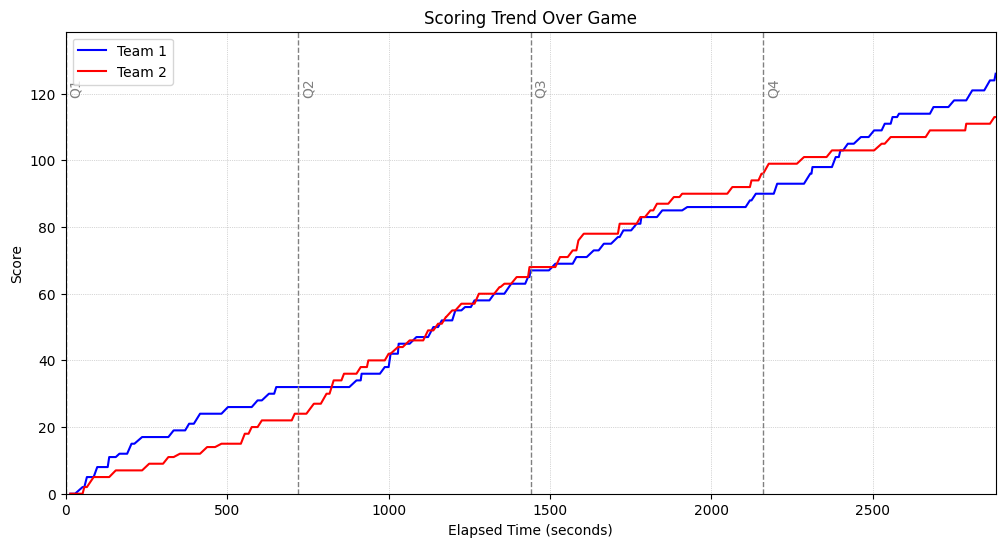

(1,
 '\nSummary:\n        \x1b126\x1b - \x1b113\x1b\n40/75   Field goals   41/77\n53.3       %       53.2\n13/34   3 pointers   12/34\n38.2       %       35.3\n33/38   Free throws  19/23\n86.8       %       82.6\n31     Rebounds   35\n27     Assists    29\n7      Blocks    3\n7      Steals    2\n7    Turnovers   14\n17      Fouls     26\n')

In [13]:
players1 = {
    'C': [
        Player(1001, "Center 1", 25, 215, 1, 3, 'C', 9, 5, 8, 6, 7, 5, 7, False, USA),
        Player(1002, "Center 2", 25, 210, 11, 3, 'C', 6, 4, 6, 5, 5, 4, 6, False, USA),
        Player(1003, "Center 3", 25, 220, 21, 3, 'C', 4, 2, 4, 4, 3, 3, 5, False, USA)
    ],
    'PF': [
        Player(1004, "Power Forward 1", 25, 203, 2, 3, 'PF', 8, 6, 7, 6, 7, 6, 6, False, USA),
        Player(1005, "Power Forward 2", 25, 210, 12, 3, 'PF', 6, 5, 6, 4, 5, 5, 5, False, USA),
        Player(1006, "Power Forward 3", 25, 205, 22, 3, 'PF', 4, 3, 3, 4, 3, 4, 4, False, USA)
    ],
    'SF': [
        Player(1007, "Small Forward 1", 25, 204, 3, 3, 'SF', 7, 7, 7, 7, 7, 7, 6, False, USA),
        Player(1008, "Small Forward 2", 25, 200, 13, 3, 'SF', 5, 5, 5, 5, 5, 5, 5, False, USA),
        Player(1009, "Small Forward 3", 25, 202, 23, 3, 'SF', 3, 3, 3, 3, 4, 4, 4, False, USA)
    ],
    'SG': [
        Player(1010, "Shooting Guard 1", 25, 195, 4, 3, 'SG', 6, 9, 6, 7, 7, 7, 6, False, USA),
        Player(1011, "Shooting Guard 2", 25, 193, 14, 3, 'SG', 4, 6, 4, 6, 5, 5, 5, False, USA),
        Player(1012, "Shooting Guard 3", 25, 197, 24, 3, 'SG', 3, 4, 3, 4, 3, 3, 4, False, USA)
    ],
    'PG': [
        Player(1013, "Point Guard 1", 25, 185, 5, 3, 'PG', 5, 8, 5, 8, 8, 9, 5, False, USA),
        Player(1014, "Point Guard 2", 25, 190, 15, 3, 'PG', 4, 7, 3, 6, 6, 7, 4, False, USA),
        Player(1015, "Point Guard 3", 25, 192, 25, 3, 'PG', 2, 5, 2, 5, 5, 5, 3, False, USA)
    ]
}

players2 = {
    'C': [
        Player(1001, "Center 1", 25, 215, 1, 3, 'C', 9, 5, 8, 6, 7, 5, 7, False, USA),
        Player(1002, "Center 2", 25, 210, 11, 3, 'C', 6, 4, 6, 5, 5, 4, 6, False, USA),
        Player(1003, "Center 3", 25, 220, 21, 3, 'C', 4, 2, 4, 4, 3, 3, 5, False, USA)
    ],
    'PF': [
        Player(1004, "Power Forward 1", 25, 203, 2, 3, 'PF', 8, 6, 7, 6, 7, 6, 6, False, USA),
        Player(1005, "Power Forward 2", 25, 210, 12, 3, 'PF', 6, 5, 6, 4, 5, 5, 5, False, USA),
        Player(1006, "Power Forward 3", 25, 205, 22, 3, 'PF', 4, 3, 3, 4, 3, 4, 4, False, USA)
    ],
    'SF': [
        Player(1007, "Small Forward 1", 25, 204, 3, 3, 'SF', 7, 7, 7, 7, 7, 7, 6, False, USA),
        Player(1008, "Small Forward 2", 25, 200, 13, 3, 'SF', 5, 5, 5, 5, 5, 5, 5, False, USA),
        Player(1009, "Small Forward 3", 25, 202, 23, 3, 'SF', 3, 3, 3, 3, 4, 4, 4, False, USA)
    ],
    'SG': [
        Player(1010, "Shooting Guard 1", 25, 195, 4, 3, 'SG', 6, 9, 6, 7, 7, 7, 6, False, USA),
        Player(1011, "Shooting Guard 2", 25, 193, 14, 3, 'SG', 4, 6, 4, 6, 5, 5, 5, False, USA),
        Player(1012, "Shooting Guard 3", 25, 197, 24, 3, 'SG', 3, 4, 3, 4, 3, 3, 4, False, USA)
    ],
    'PG': [
        Player(1013, "Point Guard 1", 25, 185, 5, 3, 'PG', 5, 8, 5, 8, 8, 9, 5, False, USA),
        Player(1014, "Point Guard 2", 25, 190, 15, 3, 'PG', 4, 7, 3, 6, 6, 7, 4, False, USA),
        Player(1015, "Point Guard 3", 25, 192, 25, 3, 'PG', 2, 5, 2, 5, 5, 5, 3, False, USA)
    ]
}

team1 = Team("Team 1", players = players1, color=blue)
team2 = Team("Team 2", players = players2, color=red)

team1.calculate_playstyle()
team2.calculate_playstyle()
simulate_game(team1, team2, 0.01, records, True, True, True, True)